### probability distributions - european roulette

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#### create Roulette

In [2]:
from roulette import Roulette

In [22]:
r = Roulette(fake_factor = 0.1225)
#r = Roulette()
df = r.sample(n = 1000)

In [4]:
df

,number,f1,f2,f3
0,9,fail,odd,red
1,1,fail,odd,red
2,25,pass,odd,red
3,32,pass,even,red
4,6,fail,even,black
...,...,...,...,...
995,2,fail,even,black
996,2,fail,even,black
997,3,fail,odd,red
998,36,pass,even,red


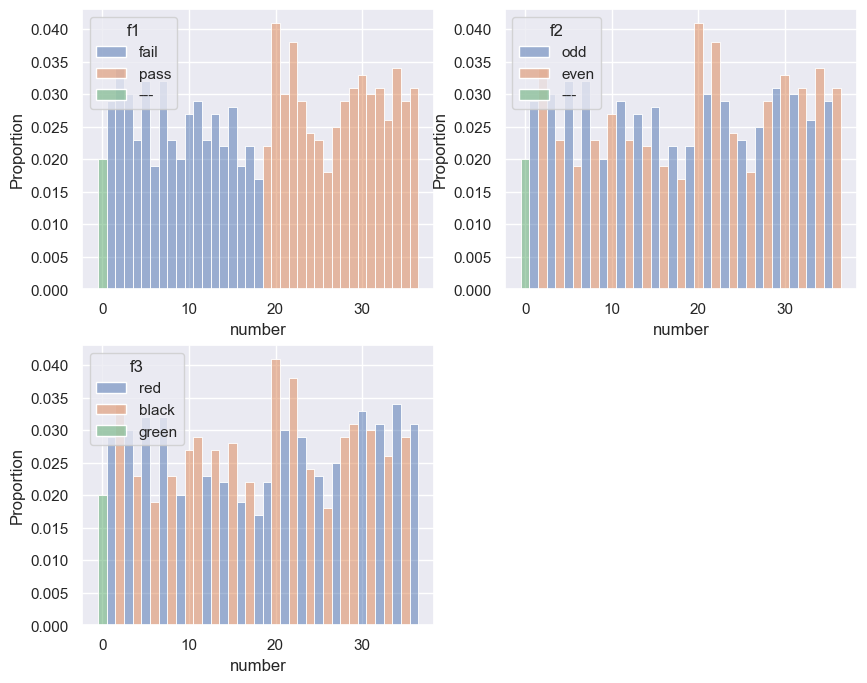

In [5]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))
sns.histplot(ax = axs[0, 0], data = df, x = 'number', hue = 'f1', discrete = True, stat = 'proportion')
sns.histplot(ax = axs[0, 1], data = df, x = 'number', hue = 'f2', discrete = True, stat = 'proportion')
sns.histplot(ax = axs[1, 0], data = df, x = 'number', hue = 'f3', discrete = True, stat = 'proportion')
axs[1, 1].axis('off');

### strategy 1. 

- Estimate univariate distribution of variable 'number' and bet to most likely number

In [6]:
# histogram
hist = np.zeros(37)
for x in df.number: hist[x] += 1
hist

array([20., 29., 34., 30., 23., 32., 19., 32., 23., 20., 27., 29., 23.,
       27., 22., 28., 19., 22., 17., 22., 41., 30., 38., 29., 24., 23.,
       18., 25., 29., 31., 33., 30., 31., 26., 34., 29., 31.])

In [7]:
np.argmax(hist)

20

In [8]:
# game simulation
fitxes = 100000
jugades = 0
while fitxes > 0 and jugades < 100000:
    jugades +=1
    fitxes -=4
    # simulem la tirada de la ruleta (inverse sampling)
    #if r.draw() == np.argmax(hist):
    if r.draw() in hist.argsort()[-4:]:
        fitxes += 37
print('+++ jugades %4d, fitxes %4d' %(jugades, fitxes))

+++ jugades 100000, fitxes 116620


##### how likely is this strategy to be winner?

- estimate the cdf of the numbers
- get a sample by inverse sampling
- get a new saple from the roulette
- if the two samples look similar:
    - we can trust de distribution we have seen
    - we can be confident about the likelihood of the number with maximum frequency

### Inverse sampling no funciona perque de 1000 no podem treure 100000 perque segueix la distribució inicial i té el componenet random

In [9]:
bins = np.arange(37)
# density (pdf)
pdf = hist /np.sum(hist) /1.0
# cumulative (cdf), bin_width is 1.0
cdf = np.cumsum(pdf *1.0)
cdf

array([0.02 , 0.049, 0.083, 0.113, 0.136, 0.168, 0.187, 0.219, 0.242,
       0.262, 0.289, 0.318, 0.341, 0.368, 0.39 , 0.418, 0.437, 0.459,
       0.476, 0.498, 0.539, 0.569, 0.607, 0.636, 0.66 , 0.683, 0.701,
       0.726, 0.755, 0.786, 0.819, 0.849, 0.88 , 0.906, 0.94 , 0.969,
       1.   ])

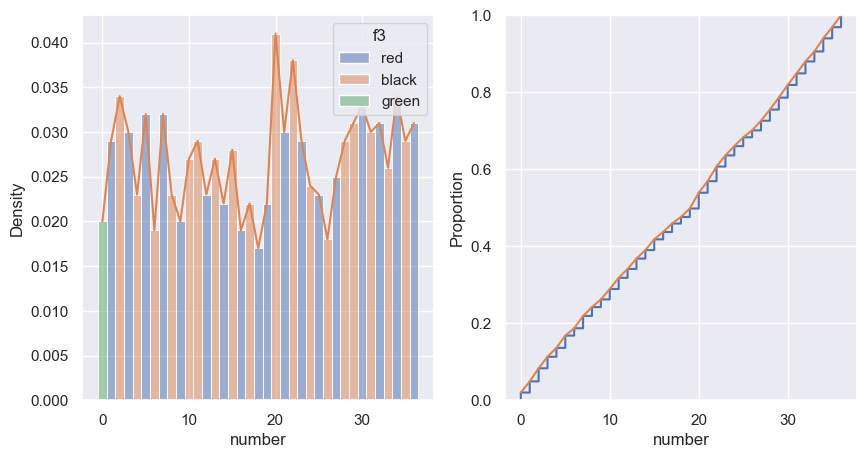

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
# check pdf
sns.histplot(ax = axs[0], data = df, x = 'number', hue = 'f3', discrete = True, stat = 'density')
sns.lineplot(ax = axs[0], x = bins, y = pdf, color = sns.color_palette()[1])
# check cdf
sns.ecdfplot(ax = axs[1], data = df, x = 'number')
sns.lineplot(ax = axs[1], x = bins, y = cdf);

In [11]:
# get sample from the cdf by inverse sampling
cdf_sample = [np.where(cdf > x)[0][0] for x in np.random.rand(1000)]

In [12]:
# new sample from the roulette
roulette_sample = [r.draw() for x in range(1000)]

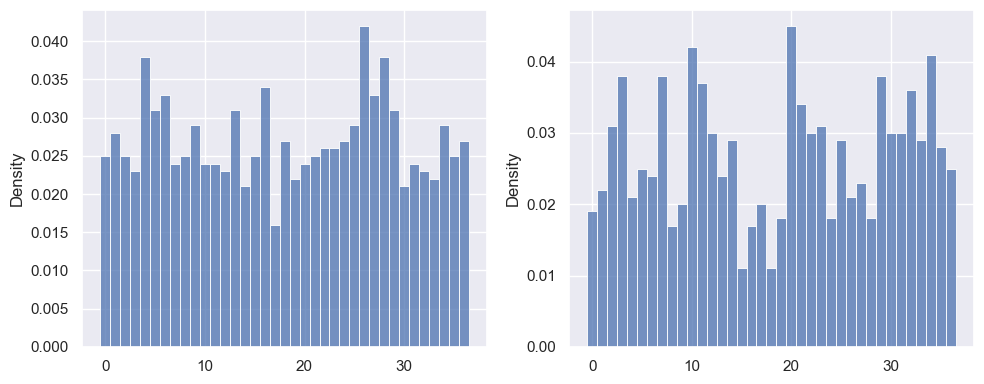

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4))
sns.histplot(ax = axs[0], data = roulette_sample, binwidth = 1, discrete = True, stat = 'density');
sns.histplot(ax = axs[1], data = cdf_sample, binwidth = 1, discrete = True, stat = 'density');
plt.tight_layout()

### Strategy 2
- Estimate multivariate distribution of f1, f2 and f3
- f1, f2 and f3 all have cardinality 2
- the multivariate distribution has cardinality $\; 2 *2 *2 = 2^3 = 8$

- El numero té una relació de 2 amb vermell o negre i sempre és parell i sempre es falla.
- Estudiar la distribució conjunta amb alguna de les seves condicions no té logica perque les variables aporten la mateixa informació.
- Histograma de numeros o de 2 vermell i pasa sería el mateix. 
- Si només considerem les altres té logica perque pot ser vermell parell i pasa (més de només el numero 2, seràn altres també). 
- Taula de contingencia sí. 

        odd                              |  even
fail    (numero parell més petit de 19)
pass 

f2

|f1 |odd|even|
|----|--|--|
|fail|x%|x%|
|pass|x%|x%|

- Si la ruleta està ben equilibrada sería 25% a cada un -> treient el 0
- Si veiem que està sesgat, pot donar una pista de com està trucada la ruleta
- Continuem depenguent de les mostres de la ruleta -> però nomès teim 4 possibilitats. Abans 36/37 diferents. Ara nomès 4. Necessitem menys mostres per estimar de la distribució de la ruleta.
- La cardinalitat de la variable és 36 al principi. 
- Després tenim una cardinalitat conjunta (f1/f2) de 4. 

- Considerem els tres factors (f1/f2/f3). la taula amb 3d (la profunditat)

f1/f2/f3

|f1 |odd|even|
|---|---|----|
|fail|x%|x%|
|pass|x%|x%|
     black

|f1 |odd|even|
|---|---|----|
|fail|x%|x%|
|pass|x%|x%|
    red
    
- Axiò si està ben equilibrada -> no sería igual perque es 36/8 = 4.5 per el que veiem abans que hi ha colors seguits. 
- En algunes caselles hi haurà 4 números i en algunes 5. 

```python
fig, axs = plt.subplots(2, 2, figsize = (10, 8))
sns.histplot(ax = axs[0, 0], data = df, x = 'number', hue = 'f1', discrete = True, stat = 'proportion')
sns.histplot(ax = axs[0, 1], data = df, x = 'number', hue = 'f2', discrete = True, stat = 'proportion')
sns.histplot(ax = axs[1, 0], data = df, x = 'number', hue = 'f3', discrete = True, stat = 'proportion')
axs[1, 1].axis('off');
```

In [14]:
# contingency table
df.groupby(['f1', 'f2', 'f3']).count()

number
f1   f2   f3           
---  ---  green      20
fail even black     126
          red        81
     odd  black     106
          red       143
pass even black     150
          red       129
     odd  black     116
          red       129

In [23]:
hist = df.groupby(['f1', 'f2', 'f3']).count().reset_index().number
np.argmax(hist)

5

In [16]:
hist

0     20
1    126
2     81
3    106
4    143
5    150
6    129
7    116
8    129
Name: number, dtype: int64

### Hem trobat un sesgo, podem fer una estategia de joc. 
- Apostem a pass, even a black per separat, apostem als tres per separat. Ells en el conjunt, tenen més probabilitat de guanyar. 
- Pass even red &rarr; guanyariem dos i perdem un. 
- Però es on tenim mes probabilitat de guanyar les tres apostes. 
- L'altre possible aposta es apostar als numeros que són pass, even i black (20,22,24,26, 28).
- Podriem apostar tres fitxes a la combinació o als numeros que ho són. 

<Axes: ylabel='number'>

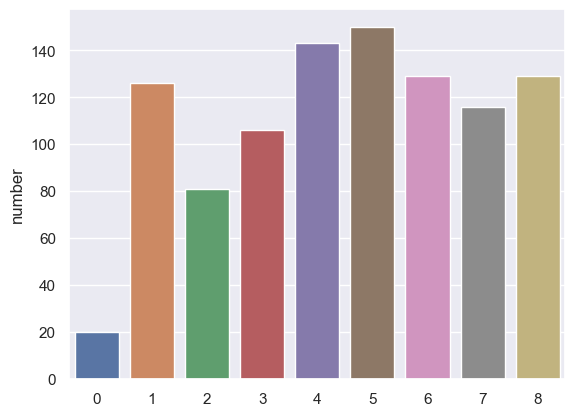

In [17]:
hist = df.groupby(['f1', 'f2', 'f3']).count().reset_index().number
sns.barplot(x = hist.index, y = hist)

<BarContainer object of 1 artists>

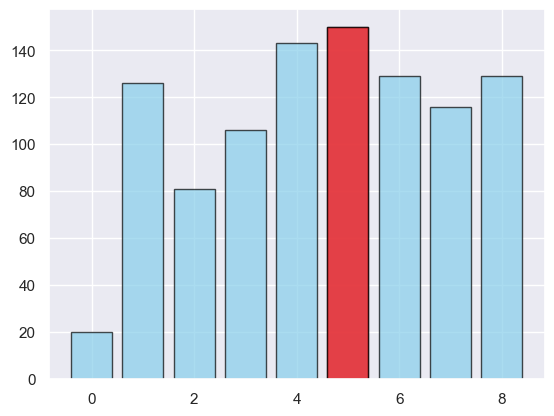

In [18]:
# Calcular el histograma
hist = df.groupby(['f1', 'f2', 'f3']).size().reset_index(name='number')

# Encontrar el índice del máximo
max_index = np.argmax(hist['number'])

# Crear el histograma
plt.bar(range(len(hist)), hist['number'], color='skyblue', edgecolor='black', alpha=0.7)

# Resaltar el máximo
plt.bar(max_index, hist['number'].iloc[max_index], color='red', edgecolor='black', alpha=0.7)

In [47]:
# game simulation
fitxes = 100
jugades = 0
while fitxes > 2 and jugades < 1000:
    # bet for pass, even, black (joint index 5)
    fitxes -=3
    jugades +=1
    number = r.draw()
    if number != 0:
        if number > 18: fitxes += 2
        if r.even(number): fitxes += 2
        if r.black(number): fitxes += 2
print('+++ jugades %4d, fitxes %4d' %(jugades, fitxes))

+++ jugades 1000, fitxes   98


### No es prou guanyador perquè la proporció de vegades que no passa es de 7 de 8 i guanya 1 de 8. Això no compensa el biaix de la ruleta.
- El biaix existeix pero la estrategia no es prou bona. Per això fem lu de sota: 

In [20]:
df.loc[(df.f1 == 'pass') &(df.f2 == 'even') &(df.f3 == 'black')].number.unique()

array([28, 20, 22, 26, 24])

In [174]:
# game simulation
fitxes = 100
jugades = 0
#while fitxes > 2 and jugades < 1000:
while fitxes > 3 and jugades < 1000:
    # bet for 20, 22, 24
    fitxes -=4
    #fitxes -=3
    jugades +=1
    number = r.draw()
    #if number in [20, 22, 24]:
    if number in [20, 22, 24, 26]:

        fitxes += 37
print('+++ jugades %4d, fitxes %4d' %(jugades, fitxes))

+++ jugades   43, fitxes    2


### Els numeros tenen més probabilitat de sortir, i si surt guanyem més. Ens podem permetre fallar per recuperar-ho. 

#### plot the joint distribution of f1, f2, f3